# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
import zipfile

zip_path = "/content/used_car.zip"
extract_path = "/content/used_car"

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_path)

import os
print(os.listdir(extract_path))

csv_path = extract_path + "/car_prices.csv"

df = pd.read_csv(
    csv_path,
    engine="python",
    on_bad_lines="skip"
)

df.head()


['car_prices.csv']


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558806 entries, 0 to 558805
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558806 non-null  int64  
 1   make          548505 non-null  object 
 2   model         548407 non-null  object 
 3   trim          548155 non-null  object 
 4   body          545611 non-null  object 
 5   transmission  493453 non-null  object 
 6   vin           558806 non-null  object 
 7   state         558806 non-null  object 
 8   condition     547012 non-null  float64
 9   odometer      558712 non-null  float64
 10  color         558057 non-null  object 
 11  interior      558057 non-null  object 
 12  seller        558806 non-null  object 
 13  mmr           558806 non-null  int64  
 14  sellingprice  558806 non-null  int64  
 15  saledate      558806 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


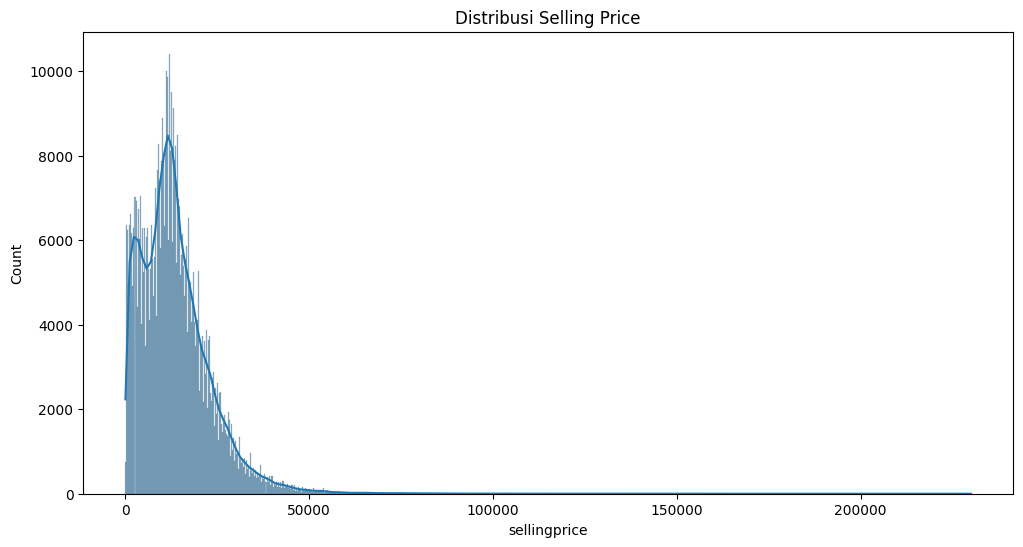

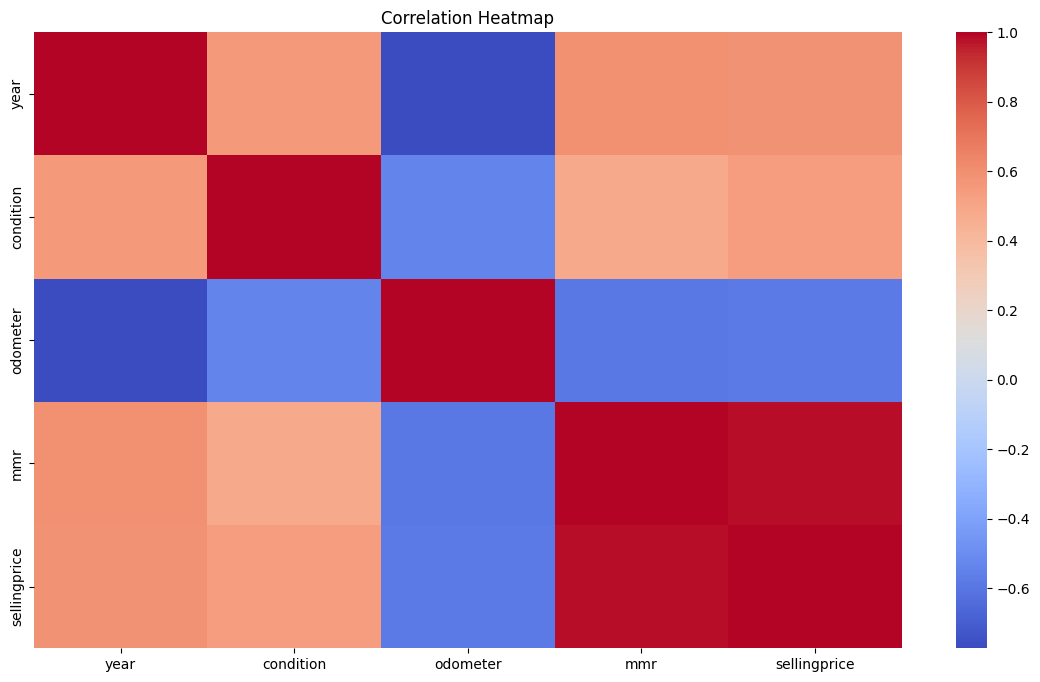

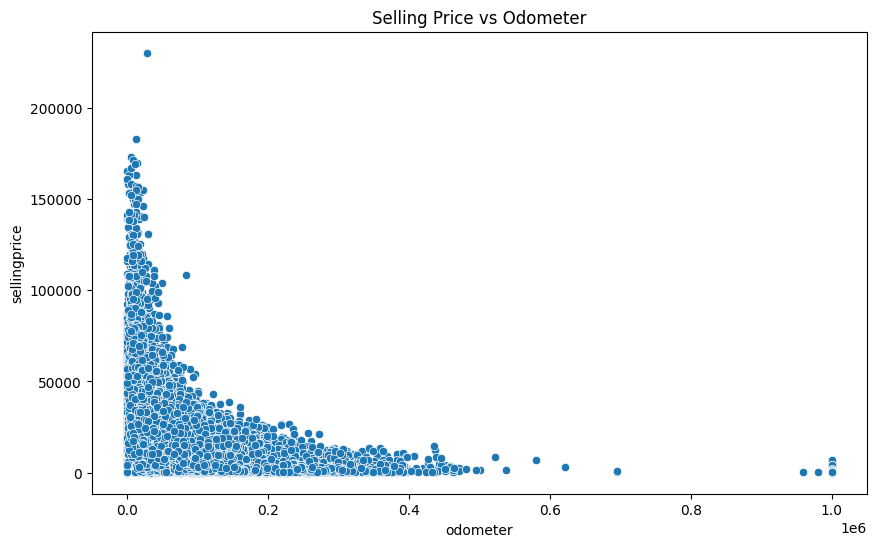

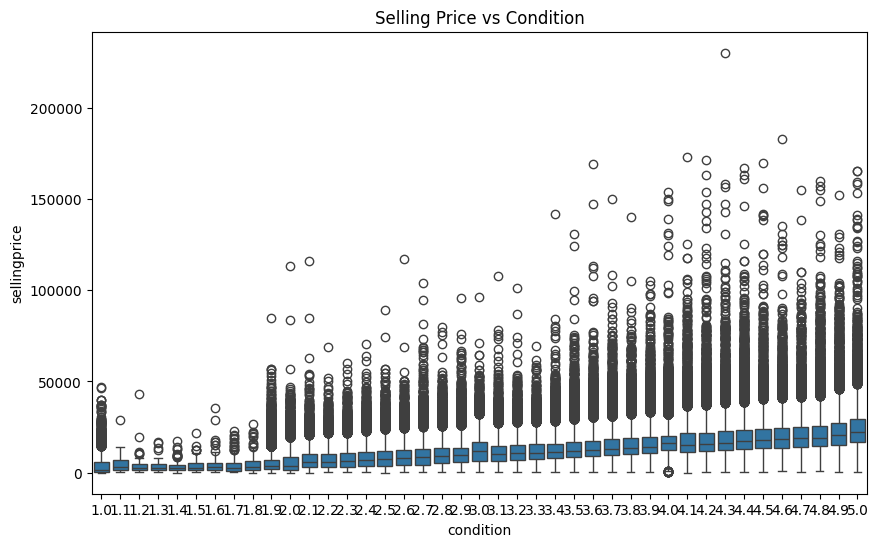

In [3]:
df.info()
df.describe()

df.isna().sum()

df.duplicated().sum()

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[categorical_cols].nunique()

plt.figure(figsize=(12,6))
sns.histplot(df['sellingprice'], kde=True)
plt.title("Distribusi Selling Price")
plt.show()

plt.figure(figsize=(14,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='odometer', y='sellingprice')
plt.title("Selling Price vs Odometer")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='condition', y='sellingprice')
plt.title("Selling Price vs Condition")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
df_clean = df.copy()

df_clean.drop_duplicates(inplace=True)
df_clean.dropna(subset=['sellingprice'], inplace=True)

df_clean['price_per_mile'] = df_clean['sellingprice'] / (df_clean['odometer'] + 1)

df_clean['saledate'] = pd.to_datetime(df_clean['saledate'], errors='coerce', utc=True)
df_clean.dropna(subset=['saledate'], inplace=True)

df_clean['sale_year'] = df_clean['saledate'].dt.year
df_clean['sale_month'] = df_clean['saledate'].dt.month
df_clean['sale_day'] = df_clean['saledate'].dt.day

df_clean = df_clean[df_clean['year'].notna()]
df_clean['year'] = df_clean['year'].astype(int)

num_cols = ['odometer','condition','mmr','price_per_mile']

Q1 = df_clean[num_cols].quantile(0.25)
Q3 = df_clean[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_clean[~(
    (df_clean[num_cols] < (Q1 - 1.5 * IQR)) |
    (df_clean[num_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]

cat_cols = ['make','model','trim','body','transmission','state','color','interior','seller']
df_processed = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

df_processed.head()


/tmp/ipython-input-2918598170.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['saledate'] = pd.to_datetime(df_clean['saledate'], errors='coerce', utc=True)


,year,vin,condition,odometer,mmr,sellingprice,saledate,price_per_mile,sale_year,sale_month,...,seller_zinc auto finance,seller_zinc used auto sales,seller_zipcar,seller_zippy rent a car llc,seller_zmax moto leasing inc,seller_zonemotors.com inc,seller_zoom auto,seller_zuma autoboat,seller_zumbrota ford sales llc,seller_zygi auto corp
0,2015,5xyktca69fg566472,5.0,16639.0,20500,21500,2014-12-16 04:30:00+00:00,1.292067,2014,12,...,False,False,False,False,False,False,False,False,False,False
7,2014,1g1pc5sb2e7128460,2.0,28617.0,11900,9800,2014-12-16 05:00:00+00:00,0.342442,2014,12,...,False,False,False,False,False,False,False,False,False,False
13,2015,5xyktca66fg561407,5.0,14634.0,20600,21500,2014-12-16 04:30:00+00:00,1.469081,2014,12,...,False,False,False,False,False,False,False,False,False,False
14,2014,1g1pe5sbxe7120097,NaN,15686.0,13900,10600,2014-12-16 04:00:00+00:00,0.675719,2014,12,...,False,False,False,False,False,False,False,False,False,False
15,2015,1n4al3ap5fc124223,2.0,11398.0,14750,14100,2014-12-23 04:00:00+00:00,1.236951,2014,12,...,False,False,False,False,False,False,False,False,False,False
